# Notebook to produce camera ready plots for Cardinality Estimation Paper

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import pearsonr
import json

import random
from matplotlib import ticker
import math

import matplotlib as mpl
from cycler import cycler


In [3]:
dataset = "yago"
query_type = "path"


# Loading Data for LMKG
gts_lmkg = np.load("../Datasets/"+dataset+"/Results/"+query_type+"/Joint_Model/gts_lmkg.npy")
preds_lmkg = np.load("../Datasets/"+dataset+"/Results/"+query_type+"/Joint_Model/preds_lmkg.npy")

# Loading Data for TPN
gts = np.load("../Datasets/"+dataset+"/Results/"+query_type+"/Joint_Model/gts.npy")
preds = np.load("../Datasets/"+dataset+"/Results/"+query_type+"/Joint_Model/preds.npy")

# Loading Data for LSS
gts_lss = np.load("../Datasets/"+dataset+"/Results/"+query_type+"/Joint_Model/gts_lss.npy")
preds_lss = np.load("../Datasets/"+dataset+"/Results/"+query_type+"/Joint_Model/preds_lss.npy")
# Take exponent as model predicts logarithm
gts_lss = 2**gts_lss
preds_lss = 2**preds_lss


# Loading Data for Cset
gts_cset = np.load("../Datasets/"+dataset+"/Results/"+query_type+"/Joint_Model/gt_cset.npy")
preds_cset = np.load("../Datasets/"+dataset+"/Results/"+query_type+"/Joint_Model/preds_cset.npy")

if not dataset == "yago":
# Loading Data for SumRDF
    gts_sumrdf = np.load("../Datasets/"+dataset+"/Results/"+query_type+"/Joint_Model/gt_sumrdf.npy")
    preds_sumrdf = np.load("../Datasets/"+dataset+"/Results/"+query_type+"/Joint_Model/preds_sumrdf.npy")

# Loading Data for IMPR
gts_impr = np.load("../Datasets/"+dataset+"/Results/"+query_type+"/Joint_Model/gt_impr.npy")
preds_impr = np.load("../Datasets/"+dataset+"/Results/"+query_type+"/Joint_Model/preds_impr.npy")

# Loading Data for jsub
gts_jsub = np.load("../Datasets/"+dataset+"/Results/"+query_type+"/Joint_Model/gt_jsub.npy")
preds_jsub = np.load("../Datasets/"+dataset+"/Results/"+query_type+"/Joint_Model/preds_jsub.npy")

# Loading Data for WanderJoin
gts_wanderjoin = np.load("../Datasets/"+dataset+"/Results/"+query_type+"/Joint_Model/gt_wanderjoin.npy")
preds_wanderjoin = np.load("../Datasets/"+dataset+"/Results/"+query_type+"/Joint_Model/preds_wanderjoin.npy")

In [5]:
def barplot(gts, preds):
    Q_Errors = []
    for bin_ in Bins:
        gts_bin =  np.array(gts[(gts > bin_[0]) & (gts < bin_[1])])
        preds_bin =  np.array(preds[(gts > bin_[0]) & (gts < bin_[1])])
        preds_bin = np.round(preds_bin)
        preds_bin[np.where(preds_bin==0)] = 1
        preds_bin[np.where(preds_bin==-1)] = 1

        #q_error = np.mean(np.maximum(gts_bin/ preds_bin, preds_bin/gts_bin))
        q_error = np.mean(q_errorf(gts_bin, preds_bin))
        Q_Errors.append(q_error)
    return Q_Errors

def barplot_mae(gts, preds):
    Q_Errors = []
    for bin_ in Bins:
        gts_bin =  np.array(gts[(gts > bin_[0]) & (gts < bin_[1])])
        preds_bin =  np.array(preds[(gts > bin_[0]) & (gts < bin_[1])])
        q_error = np.mean(np.abs(gts_bin - preds_bin))
        Q_Errors.append(q_error)
    return Q_Errors

def q_errorf(gts, preds, mode="q", rounded=True):
    if rounded:
        preds = np.round(preds)
    preds[np.where(preds==0)] = 1
    if mode=="mae":
        return np.abs(gts-preds)
    else:
        return np.maximum(gts/ preds, preds/gts)


In [6]:
Bins = [(1, 5**1), (5**1, 5**2), (5**2, 5**3),(5**3, 5**4),(5**4, 5**5),(5**5, 5**6),(5**6, 5**9) ]
#Bins = [(1, 5**1), (5**1, 5**2), (5**2, 5**3),(5**3, 5**4),(5**4, 5**5),(5**5, 5**9) ]

### Plot for LMKG 

In [7]:
Q_Errors_LMKG = barplot(gts_lmkg, preds_lmkg)

In [8]:
np.mean(Q_Errors_LMKG)

70.18756299008682

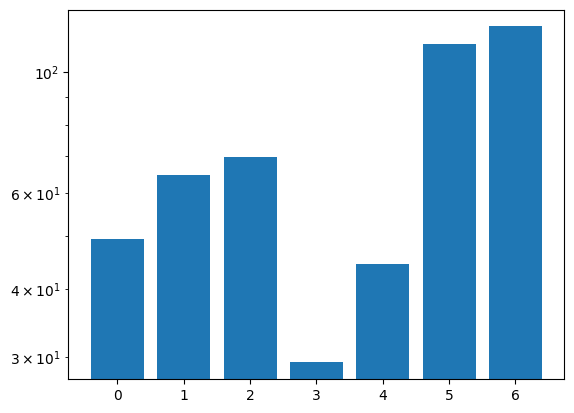

In [9]:
plt.bar([i for i in range(len(Q_Errors_LMKG))],Q_Errors_LMKG)
plt.yscale("log")


### Plot for GNCE

In [11]:
Q_Errors_GNCE = barplot(gts, preds)

In [12]:
np.mean(Q_Errors_GNCE)

3.799554212914661

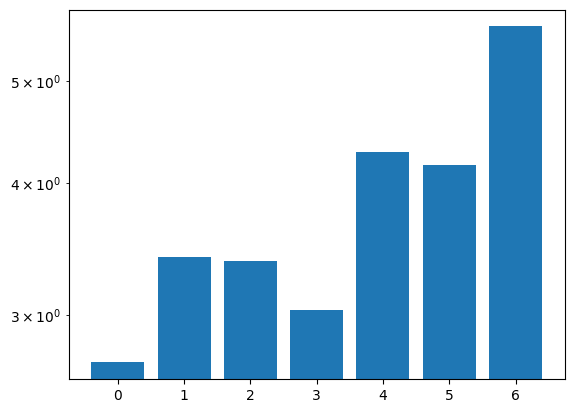

In [13]:
plt.bar([i for i in range(len(Q_Errors_GNCE))],Q_Errors_GNCE)
plt.yscale("log")

## Plot for LSS 

In [14]:
Q_Errors_LSS = barplot(gts_lss, preds_lss)

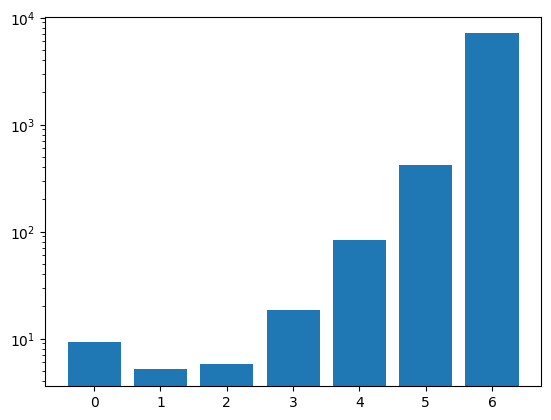

In [15]:
plt.bar([i for i in range(len(Q_Errors_LSS))],Q_Errors_LSS)
plt.yscale("log")

## Joint Plot LMKG, GNCE

Text(0, 0.5, 'Mean Q-Error')

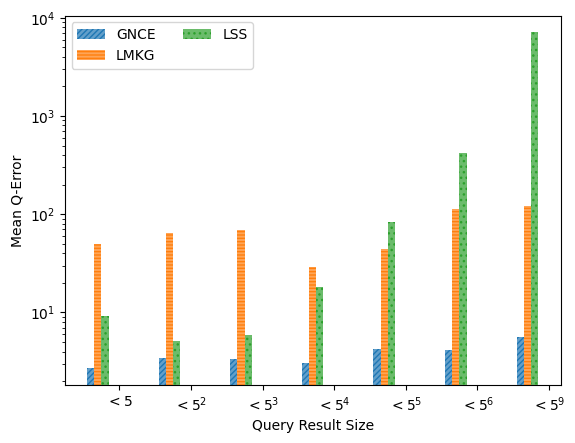

In [16]:
X_Axis = np.arange(len(Q_Errors_GNCE))

bar_cycle = (cycler('hatch', ['//////', '-----', '...','oooo', 'xxx','**', 'OOO', '\\\\']))
styles = bar_cycle()

colormap = mpl.cm.tab10.colors

data = [Q_Errors_GNCE, Q_Errors_LMKG, Q_Errors_LSS]

labels = ["GNCE", "LMKG", "LSS"]


for i in range(len(data)):
    hatch_color = list(colormap[i])
    plt.rcParams['hatch.color'] = colormap[i]
    plt.bar(X_Axis - 0.4 + 0.1*i,data[i], 0.1, label=labels[i], color=colormap[i], alpha=0.7, **next(styles))



#plt.bar(X_Axis - 0.2,Q_Errors_GNCE, 0.1, label="GNCE")
#plt.bar(X_Axis - 0.1,Q_Errors_LMKG, 0.1, label="LMKG")
#plt.bar(X_Axis + 0,Q_Errors_LSS, 0.1, label="LSS")
#plt.bar(X_Axis + 0.1,Q_Errors_GIN, 0.1, label="GIN")


plt.yscale("log")

plt.legend(ncol=2)
plt.xticks(X_Axis, ["$< 5$", "$< 5^2$", "$< 5^3$", "$< 5^4$", "$< 5^5$", "$< 5^6$", "$< 5^9$"])
plt.xlabel("Query Result Size")
plt.ylabel("Mean Q-Error")
#plt.savefig("inductive_barplot.pdf")

## Plot for Cset 

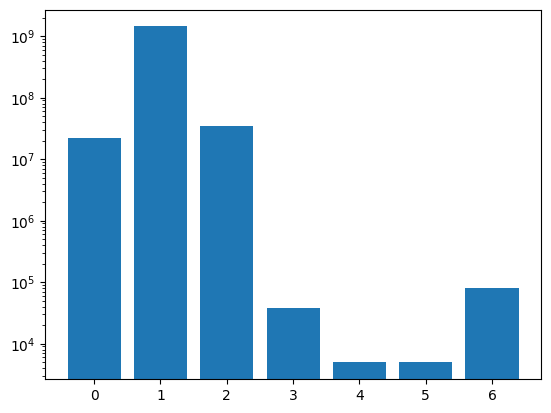

In [18]:
Q_Errors_CSET = barplot(gts_cset, preds_cset)
plt.bar([i for i in range(len(Q_Errors_CSET))],Q_Errors_CSET)
plt.yscale("log")


## Plot for SumRDF

In [21]:
if dataset != "yago":
    Q_Errors_SUMRDF = barplot(gts_sumrdf, preds_sumrdf)
    plt.bar([i for i in range(len(Q_Errors_SUMRDF))],Q_Errors_SUMRDF)
    plt.yscale("log")
else:
    Q_Errors_CSET = [0,0,0,0,0,0,0]



### Plot for  IMPR


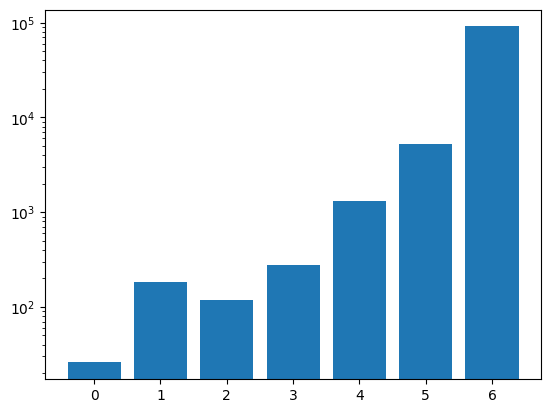

In [23]:
Q_Errors_IMPR = barplot(gts_impr, preds_impr)
plt.bar([i for i in range(len(Q_Errors_IMPR))],Q_Errors_IMPR)
plt.yscale("log")

## Plot for JSUB 

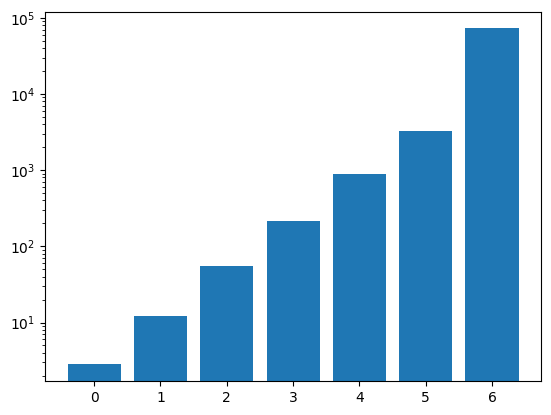

In [24]:
Q_Errors_JSUB = barplot(gts_jsub, preds_jsub)
plt.bar([i for i in range(len(Q_Errors_JSUB))],Q_Errors_JSUB)
plt.yscale("log")

## Plot for WanderJoin 

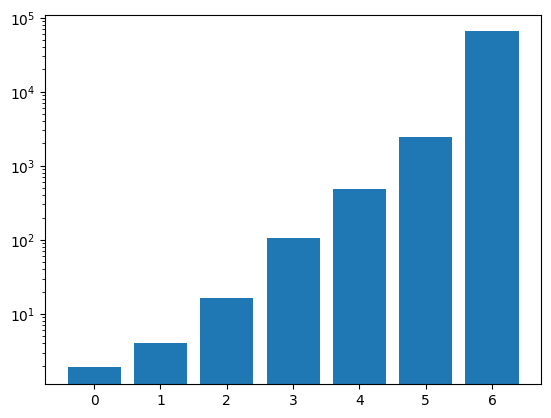

In [25]:
Q_Errors_WJOIN = barplot(gts_wanderjoin, preds_wanderjoin)
plt.bar([i for i in range(len(Q_Errors_WJOIN))],Q_Errors_WJOIN)
plt.yscale("log")

In [27]:
import matplotlib as mpl
from cycler import cycler


### Joint Plot

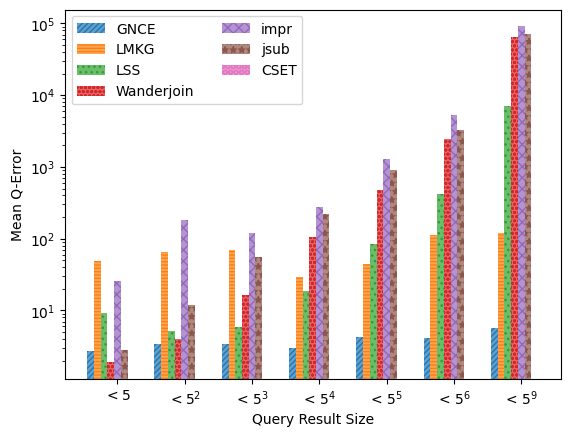

In [28]:

#plt.style.use('grayscale')

bar_cycle = (cycler('hatch', ['//////', '-----', '...','oooo', 'xxx','**', 'OOO', '\\\\']))
styles = bar_cycle()

colormap = mpl.cm.tab10.colors


X_Axis = np.arange(len(Q_Errors_GNCE))

if dataset == "yago":
    data = [Q_Errors_GNCE, Q_Errors_LMKG, Q_Errors_LSS, Q_Errors_WJOIN, Q_Errors_IMPR, Q_Errors_JSUB, Q_Errors_CSET]
    labels = ["GNCE", "LMKG", "LSS", "Wanderjoin", "impr", "jsub", "CSET"]
else:
    data = [Q_Errors_GNCE, Q_Errors_LMKG, Q_Errors_LSS, Q_Errors_WJOIN, Q_Errors_IMPR, Q_Errors_JSUB, Q_Errors_CSET,
           Q_Errors_SUMRDF]
    #data = [Q_Errors_GNCE, Q_Errors_LMKG, Q_Errors_LSS, Q_Errors_WJOIN, Q_Errors_IMPR, Q_Errors_JSUB,
    #       Q_Errors_SUMRDF]
    #labels = ["GNCE", "LMKG", "LSS", "Wanderjoin", "impr", "jsub","SUMRDF"]
    labels = ["GNCE", "LMKG", "LSS", "Wanderjoin", "impr", "jsub", "CSET","SUMRDF"]



for i in range(len(data)):
    hatch_color = list(colormap[i])
    plt.rcParams['hatch.color'] = colormap[i]
    plt.bar(X_Axis - 0.4 + 0.1*i,data[i], 0.1, label=labels[i], color=colormap[i], alpha=0.7, **next(styles))



#plt.ylim(1, 11**5)

plt.yscale("log")

plt.legend(ncol=2)
plt.xticks(X_Axis, ["$< 5$", "$< 5^2$", "< $5^3$", "< $5^4$", "< $5^5$", "< $5^6$", "< $5^9$"])
#plt.xticks(X_Axis, ["$< 5$", "$< 5^2$", "< $5^3$", "< $5^4$", "< $5^5$", "< $5^9$"])

plt.xlabel("Query Result Size")
plt.ylabel("Mean Q-Error")
plt.savefig(dataset+ "_"+ query_type + "_barplot.pdf")

# Boxplots 

In [29]:
def boxplot(gts, preds):
    Q_Errors = []
    for bin_ in Bins:
        gts_bin =  np.array(gts[(gts > bin_[0]) & (gts < bin_[1])])
        preds_bin =  np.array(preds[(gts > bin_[0]) & (gts < bin_[1])])
        preds_bin[np.where(preds_bin==0)] = 1
        q_error = np.maximum(gts_bin/ preds_bin, preds_bin/gts_bin)
        Q_Errors.append(q_error)
    return Q_Errors

In [30]:
def q_error(gts, preds, mode="mae", rounded=False, overunder=False):
    if rounded:
        preds = np.abs(np.round(preds))
    preds[np.where(preds==0)] = 1
    preds[np.where(preds==-1)] = 1

    if mode=="mae":
        return np.abs(gts-preds)
    else:
        if overunder:
            return np.where(preds>gts, preds/gts, -gts/preds)
        else:
            return np.maximum(gts/ preds, preds/gts)

In [31]:
colormap = mpl.cm.tab10.colors

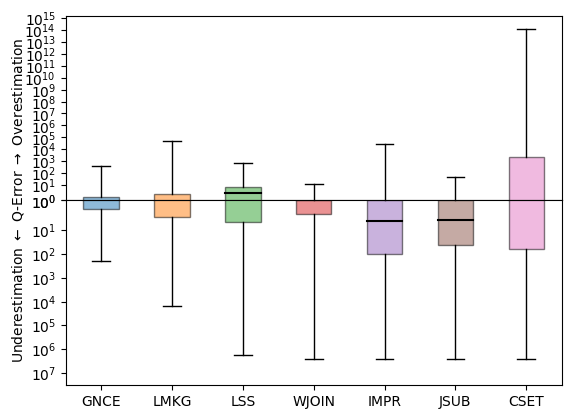

In [34]:
from matplotlib import ticker
import math

mode = "q"
rounded = True
overunder= True
q_GNCE = q_error(gts, preds, mode=mode, rounded=rounded, overunder=overunder)
q_LMKG = q_error(gts_lmkg, preds_lmkg, mode=mode, rounded=rounded, overunder=overunder)
q_LSS = q_error(gts_lss, preds_lss, mode=mode, rounded=rounded, overunder=overunder)
q_CSET = q_error(gts_cset, preds_cset, mode=mode, rounded=rounded, overunder=overunder)
q_WJOIN = q_error(gts_wanderjoin, preds_wanderjoin, mode=mode, rounded=rounded, overunder=overunder)
q_IMPR = q_error(gts_impr, np.abs(preds_impr), mode=mode, rounded=rounded, overunder=overunder)
q_JSUB = q_error(gts_jsub, preds_jsub, mode=mode, rounded=rounded, overunder=overunder)
#q_SUMRDF = q_error(gts_sumrdf, preds_sumrdf, rounded=rounded, mode=mode, overunder=overunder)


#data = [q_GNCE, q_LMKG, q_CSET, q_WJOIN, q_IMPR, q_JSUB, q_LSS, q_SUMRDF]
data = [q_GNCE, q_LMKG, q_LSS, q_WJOIN, q_IMPR, q_JSUB, q_CSET]
#data = [q_GNCE, q_LMKG, q_LSS]

#data = [ q_GNCE, q_LMKG]
#plt.boxplot(data, sym="")


fig, (ax1, ax2) = plt.subplots(2, 1, sharex=True)
fig.subplots_adjust(hspace=0.0)
#ax1.boxplot(data)
#ax2.boxplot(data)

medianprops = dict(color="black",linewidth=1.5)

bplot1 = ax1.boxplot(data, whis=(0,100), sym="", patch_artist=True,medianprops=medianprops)
bplot2 = ax2.boxplot(data, whis=(0,100), sym="", patch_artist=True, medianprops=medianprops)


colors = ['pink', 'lightblue', 'lightgreen', 'lightgreen', 'lightgreen', 'lightgreen', 'lightgreen']
for bplot in (bplot1, bplot2):
    for patch, color in zip(bplot['boxes'], colormap):
        patch.set_facecolor(color)
        patch.set_alpha(0.5)

@ticker.FuncFormatter
def major_formatter(x, pos):
    label = "$10^{"+str(int(math.log10(abs(x))))+"}$" if x!=0 else ""
    return label

#plt.set_yticklabels([f"{abs(100*x)}%" for x in ax.get_yticks()])
#plt.ylim(-100,100)
#plt.yticks([100,100])
plt.yscale("symlog")
ax1.set_yscale("symlog")
ax = plt.gca()
ax1.set_ylim(bottom=1)
#ax1.set_ylim(top=1e9)

ax2.set_ylim(top=-1)
#ax2.set_ylim(bottom=-1e9)


ax1.yaxis.set_major_formatter(major_formatter)
ax2.yaxis.set_major_formatter(major_formatter)

#plt.xticks([1,2, 3,4,5,6,7,8],["GNCE","LMKG", "CSET","WJOIN","IMPR","JSUB", "LSS", "SUMRDF"])
plt.xticks([1,2,3,4,5,6,7],["GNCE","LMKG","LSS","WJOIN","IMPR","JSUB", "CSET"])

ax2.set_ylabel(r'Underestimation $\leftarrow$ Q-Error $\rightarrow$ Overestimation')
ax2.yaxis.set_label_coords(x = -0.08, y= 1)

plt.savefig(dataset + "_" + query_type + "_boxplot.pdf")

#ticks2 = []
#ax.set_yticklabels(ticks2)
